<a href="https://colab.research.google.com/github/ItunuIsewon/MACHINE-LEARNING-FOR-HOST-PATHOGEN-PROTEIN-PROTEIN-INTERACTION-PREDICTION-TUTORIAL/blob/main/Dataset_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Positive Dataset**
The positive dataset used in this tutorial comprises experimentally verified human-bacterial protein-protein interactions retrieved from the Bacterial and Viral Bioinformatics Resource Centre (BV-BRC) database (https://www.bv-brc.org/).
To access the data, navigate to the bacteria page
(https://www.bv-brc.org/view/Bacteria/2), which lists 20 bacterial genera.


For this tutorial we selected a total of 4,459 interactions human-bacteria interactions from four genera, including 649 human-*Bacillus*, 62 human-*Escherichia coli*, 1,199 human-*Francisella*, and 2,549 human-*Yersinia* interactions. Other genera were excluded due to the absence or limited number of host-pathogen interactions data.




For each of the selected genera, repeat the following steps:


1.  Click on the genus name to open its overview page.
2.  Navigate to the Interactions tab.
3. Toggle the Filters display and apply the following filters:
    
     **Category**: HPI (Host-Pathogen Interaction)
    
     **Evidence**: Experimental
    
     **Genome Name B**: Homo sapiens

4. Download the filtered interaction data as csv. This will serve as the HPI dataset.
5. Next, select the entire filtered interaction table and click on the FASTA icon to view FASTA protein. Download the resulting page as it contains the protein sequence (FASTA format) for all the interaction entries. This downloaded file will serve as your sequence dataset.
  








##Bacillus- Pathogen Sequence Matching

###**Step 1**: **Install and Import needed packages**

In [ ]:
#install Biopython
!pip install Biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.5 MB/s eta 0:00:00


In [ ]:
#Mounting Google Drive to access files
import os
from google.colab import drive
drive.mount ('/content/my_drive')

#import pandas for data manipulation
import pandas as pd



Mounted at /content/my_drive


###**Step 2: Load your data from Google drive**











Create a folder in your drive named HPI where all the downloaded data are stored

In [ ]:
file_path = '/content/my_drive/My Drive/HPI'

#Load the protein list from the CSV file
protein_csv = file_path+"/BacillusHPI_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

#Extract the protein IDs for the bacteria (in this case RefSeq Locus Tag A)
protein_ids = protein_df["RefSeq Locus Tag A"].tolist()  # Extract the protein names


###**Step 3: Parse the FASTA file and create a dictionary of sequences.**




Each FASTA record contains two parts- **the header** and **the sequence**. In this step, the script  parses the header of each record to extract the unique protein identifier which in this case is located in the third position of the header (when split by the | character). This identifier is used to match each sequence with its corresponding protein ID.
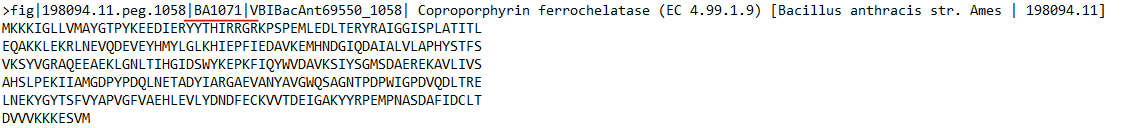

In [ ]:
# Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path+"/Bacillus_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()
        fasta_dict[protein_id] = str(record.seq)


###**Step 4: Match protein IDs with sequence**

In [ ]:
# Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    matched_data.append({"ProteinID": protein_id, "Sequence": sequence})

#Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/bacillus_protein_sequences.csv", index=False)

print("Matching completed! Results saved to 'bacillus_protein_sequences.csv'.")


Matching completed! Results saved to 'bacillus_protein_sequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)

print(f"Matching completed! Results saved to 'bacillusproteinsequences.csv'.")
print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Matching completed! Results saved to 'bacillusproteinsequences.csv'.
Total proteins: 649
Matched: 649
Unmatched: 0


##Bacillus- Host Sequence Matching
Repeat steps 2 - 4

**To match protein sequeces for the host (human) protein, we will repeat steps 2 to 4 this time using host protein identifiers.**

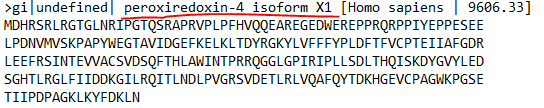

In [ ]:
#For the host (human) protein
import pandas as pd
from Bio import SeqIO
import re

# For the host (human) protein

# Step 1: Load the protein list from the appropriate column
protein_csv = file_path + "/BacillusHPI_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

# Extract the protein IDs for the host (in this case Interactor B Desc)
protein_names = protein_df["Interactor B Desc"].tolist()

# Step 2: Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path + "/Bacillus_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein name and sequence from the FASTA file
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|" and extract the relevant portion
    header_parts = record.description.split("|")

    if len(header_parts) > 2:
        # Extract the full protein name
        protein_name = header_parts[2].strip()

        # Remove only the final square-bracketed section (e.g., [Homo sapiens | 9606.33])
        protein_name = re.sub(r'\s*\[[^\[\]]+\]\s*$', '', protein_name).strip()

        fasta_dict[protein_name] = str(record.seq)

# Step 3: Match protein names with sequences (allow partial matching)
matched_data = []
for protein_name in protein_names:
    matched_sequence = None
    for fasta_name, sequence in fasta_dict.items():
        if protein_name.lower() in fasta_name.lower():  # Case insensitive partial matching
            matched_sequence = sequence
            break

    # Add match or None
    matched_data.append({"ProteinName": protein_name, "Sequence": matched_sequence})

# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/bacillushostsequences.csv", index=False)

print("Matching completed! Results saved to 'bacillushostsequences.csv'.")



Matching completed! Results saved to 'bacillushostsequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)

print(f"Matching completed! Results saved to 'bacillushostsequences.csv'.")
print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Matching completed! Results saved to 'bacillushostsequences.csv'.
Total proteins: 649
Matched: 649
Unmatched: 0


**Step 5: Merge host and pathogen protein ID-sequence pairs into a single file in a one to one row match.**

In [ ]:


# Load the host and pathogen CSV files
host_df = pd.read_csv(file_path + "/bacillushostsequences.csv")
pathogen_df = pd.read_csv(file_path + "/bacillus_protein_sequences.csv")

#Rename the columns for clarity
host_df.columns = ["Host Protein", "Host Sequence"]
pathogen_df.columns = ["Pathogen Protein", "Pathogen Sequence"]

# Merge both DataFrames side by side (column-wise)
merged_df = pd.concat([host_df, pathogen_df], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv(file_path + "/host_bacillus_pairs.csv", index=False)

print("Merging completed. File saved as 'host_bacillus_pairs.csv'.")


Merging completed. File saved as 'host_bacillus_pairs.csv'.


##Ecoli

###Pathogen Sequence Matching

In [ ]:
#Load the protein list from the CSV file
protein_csv = file_path+"/Ecoli_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

#Extract the protein IDs for the bacteria (in this case RefSeq Locus Tag A)
protein_ids = protein_df["RefSeq Locus Tag A"].tolist()  # Extract the protein names

# Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path+"/Ecoli_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()
        fasta_dict[protein_id] = str(record.seq)

# Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    matched_data.append({"ProteinID": protein_id, "Sequence": sequence})

#Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/ecoli_protein_sequences.csv", index=False)

print("Matching completed! Results saved to 'ecoli_protein_sequences.csv'.")



Matching completed! Results saved to 'ecoli_protein_sequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Total proteins: 62
Matched: 62
Unmatched: 0


###Host Sequence Matching

In [ ]:
#For the host (human) protein
import pandas as pd
from Bio import SeqIO
import re

# For the host (human) protein

# Step 1: Load the protein list from the appropriate column
protein_csv = file_path + "/Ecoli_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

# Extract the protein IDs for the host (in this case Interactor B Desc)
protein_names = protein_df["Interactor B Desc"].tolist()

# Step 2: Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path + "/Ecoli_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein name and sequence from the FASTA file
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|" and extract the relevant portion
    header_parts = record.description.split("|")

    if len(header_parts) > 2:
        # Extract the full protein name
        protein_name = header_parts[2].strip()

        # Remove only the final square-bracketed section (e.g., [Homo sapiens | 9606.33])
        protein_name = re.sub(r'\s*\[[^\[\]]+\]\s*$', '', protein_name).strip()

        fasta_dict[protein_name] = str(record.seq)

# Step 3: Match protein names with sequences (allow partial matching)
matched_data = []
for protein_name in protein_names:
    matched_sequence = None
    for fasta_name, sequence in fasta_dict.items():
        if protein_name.lower() in fasta_name.lower():  # Case insensitive partial matching
            matched_sequence = sequence
            break

    # Add match or None
    matched_data.append({"ProteinName": protein_name, "Sequence": matched_sequence})

# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/ecolihostsequences.csv", index=False)

print("Matching completed! Results saved to 'ecolihostsequences.csv'.")


Matching completed! Results saved to 'ecolihostsequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Total proteins: 62
Matched: 62
Unmatched: 0


In [ ]:
#merge host and pathogen
# Load the host and pathogen CSV files
host_df = pd.read_csv(file_path + "/ecolihostsequences.csv")
pathogen_df = pd.read_csv(file_path + "/ecoli_protein_sequences.csv")

#Rename the columns for clarity
host_df.columns = ["Host Protein", "Host Sequence"]
pathogen_df.columns = ["Pathogen Protein", "Pathogen Sequence"]

# Merge both DataFrames side by side (column-wise)
merged_df = pd.concat([host_df, pathogen_df], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv(file_path + "/host_ecoli_pairs.csv", index=False)

print("Merging completed. File saved as 'host_ecoli_pairs.csv'.")


Merging completed. File saved as 'host_ecoli_pairs.csv'.


##Fransicella

###Pathogen Sequence Matching

In [ ]:
#Load the protein list from the CSV file
protein_csv = file_path+"/Francisella_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

#Extract the protein IDs for the bacteria (in this case RefSeq Locus Tag A)
protein_ids = protein_df["RefSeq Locus Tag A"].tolist()  # Extract the protein names

# Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path+"/Francisella_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()
        fasta_dict[protein_id] = str(record.seq)

# Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    matched_data.append({"ProteinID": protein_id, "Sequence": sequence})

#Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/francisella_protein_sequences.csv", index=False)

print("Matching completed! Results saved to 'francisella_protein_sequences.csv'.")



Matching completed! Results saved to 'francisella_protein_sequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Total proteins: 1199
Matched: 1199
Unmatched: 0


###Host Sequence Matching

In [ ]:
#For the host (human) protein
import pandas as pd
from Bio import SeqIO
import re

# For the host (human) protein

# Step 1: Load the protein list from the appropriate column
protein_csv = file_path + "/Francisella_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

# Extract the protein IDs for the host (in this case Interactor B Desc)
protein_names = protein_df["Interactor B Desc"].tolist()

# Step 2: Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path + "/Francisella_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein name and sequence from the FASTA file
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|" and extract the relevant portion
    header_parts = record.description.split("|")

    if len(header_parts) > 2:
        # Extract the full protein name
        protein_name = header_parts[2].strip()

        # Remove only the final square-bracketed section (e.g., [Homo sapiens | 9606.33])
        protein_name = re.sub(r'\s*\[[^\[\]]+\]\s*$', '', protein_name).strip()

        fasta_dict[protein_name] = str(record.seq)

# Step 3: Match protein names with sequences (allow partial matching)
matched_data = []
for protein_name in protein_names:
    matched_sequence = None
    for fasta_name, sequence in fasta_dict.items():
        if protein_name.lower() in fasta_name.lower():  # Case insensitive partial matching
            matched_sequence = sequence
            break

    # Add match or None
    matched_data.append({"ProteinName": protein_name, "Sequence": matched_sequence})

# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/francisellahostsequences.csv", index=False)

print("Matching completed! Results saved to 'francisellahostsequences.csv'.")

Matching completed! Results saved to 'francisellahostsequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Total proteins: 1199
Matched: 1199
Unmatched: 0


In [ ]:
#merge host and pathogen
# Load the host and pathogen CSV files
host_df = pd.read_csv(file_path + "/francisellahostsequences.csv")
pathogen_df = pd.read_csv(file_path + "/francisella_protein_sequences.csv")

#Rename the columns for clarity
host_df.columns = ["Host Protein", "Host Sequence"]
pathogen_df.columns = ["Pathogen Protein", "Pathogen Sequence"]

# Merge both DataFrames side by side (column-wise)
merged_df = pd.concat([host_df, pathogen_df], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv(file_path + "/host_francisella_pairs.csv", index=False)

print("Merging completed. File saved as 'host_francisella_pairs.csv'.")


Merging completed. File saved as 'host_francisella_pairs.csv'.


##Yersinia

###Pathogen Sequence Matching

In [ ]:
#Load the protein list from the CSV file
protein_csv = file_path+"/Yersinia_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

#Extract the protein IDs for the bacteria (in this case RefSeq Locus Tag A)
protein_ids = protein_df["RefSeq Locus Tag A"].tolist()  # Extract the protein names

# Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path+"/Yersinia_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()
        fasta_dict[protein_id] = str(record.seq)

# Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    matched_data.append({"ProteinID": protein_id, "Sequence": sequence})

#Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/yersinia_protein_sequences.csv", index=False)

print("Matching completed! Results saved to 'yersinia_protein_sequences.csv'.")



Matching completed! Results saved to 'yersinia_protein_sequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Total proteins: 2549
Matched: 2549
Unmatched: 0


###Host Sequence Matching

In [ ]:
#For the host (human) protein
import pandas as pd
from Bio import SeqIO
import re

# For the host (human) protein

# Step 1: Load the protein list from the appropriate column
protein_csv = file_path + "/Yersinia_ppi.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)

# Extract the protein IDs for the host (in this case Interactor B Desc)
protein_names = protein_df["Interactor B Desc"].tolist()

# Step 2: Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path + "/Yersinia_genome_feature.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the protein name and sequence from the FASTA file
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|" and extract the relevant portion
    header_parts = record.description.split("|")

    if len(header_parts) > 2:
        # Extract the full protein name
        protein_name = header_parts[2].strip()

        # Remove only the final square-bracketed section (e.g., [Homo sapiens | 9606.33])
        protein_name = re.sub(r'\s*\[[^\[\]]+\]\s*$', '', protein_name).strip()

        fasta_dict[protein_name] = str(record.seq)

# Step 3: Match protein names with sequences (allow partial matching)
matched_data = []
for protein_name in protein_names:
    matched_sequence = None
    for fasta_name, sequence in fasta_dict.items():
        if protein_name.lower() in fasta_name.lower():  # Case insensitive partial matching
            matched_sequence = sequence
            break

    # Add match or None
    matched_data.append({"ProteinName": protein_name, "Sequence": matched_sequence})

# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/yersiniahostsequences.csv", index=False)

print("Matching completed! Results saved to 'yersiniahostsequences.csv'.")



Matching completed! Results saved to 'yersiniahostsequences.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")


Total proteins: 2549
Matched: 2549
Unmatched: 0


In [ ]:
#merge host and pathogen
# Load the host and pathogen CSV files
host_df = pd.read_csv(file_path + "/yersiniahostsequences.csv")
pathogen_df = pd.read_csv(file_path + "/yersinia_protein_sequences.csv")

#Rename the columns for clarity
host_df.columns = ["Host Protein", "Host Sequence"]
pathogen_df.columns = ["Pathogen Protein", "Pathogen Sequence"]

# Merge both DataFrames side by side (column-wise)
merged_df = pd.concat([host_df, pathogen_df], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv(file_path + "/host_yersinia_pairs.csv", index=False)

print("Merging completed. File saved as 'host_yersinia_pairs.csv'.")


Merging completed. File saved as 'host_yersinia_pairs.csv'.


After running this script, you will obtain human-bacillus host-pathogen interaction (HPI) dataset containing protein IDs and corresponding sequence in both the host and the pathogen.

To process other baterial genera (*Escherichia coli, Francisella, Yersinia*) you follow the same steps to extract and match protein IDs with their sequences for the host and the pathogen.


#**Negative Dataset**


To make this step less computationally intensive, we carried out the following steps.


**PATHOGEN PROTEINS**

**Step 1: Download the list of proteins and their sequences for the selected bacterial species** (Bacillus anthracis, Escherichia coli, Francisella tularensis, and Yersinia pestis).

*   From the PATRIC database, use the search bar to find the specific specie present in the positive datase  to open its overview page.
*  **Type the species name exactly as shown below to locate the correct reference genome.**
  *   Bacillus: Bacillus anthracis str.Ames,
  *    Ecoli: Escherichia coli O157:H7 str. Sakai,
  *   Francisella: Francisella tularensis subsp. tularensis SCHU S4,
  *   Yersinia: Yersinia pestis CO92.
*   **From the search result, click on the taxonomy name that matches the search to go to its overview page**.
*   **Select the "Proteins" tab** to veiw the full list of protein-coding genes.
*   **Download the protein table** by clicking the CSV option under the "Download" tab.
*   To **download the protein sequences**:  

    *   Select all the proteins on the page.
    *  Click on the dowmload tab.
    *  Choose "Protein FASTA".

This will give you the protein table (CSV) and the protein sequence (FASTA) for each bacterial specie.
    
  * Bacillus: Bacillus anthracis str.Ames - 5699 proteins
  *    Ecoli: Escherichia coli O157:H7 str. Sakai - 5725 proteins
  *   Francisella: Francisella tularensis subsp. tularensis SCHU S4 - 20,826 proteins
  *   Yersinia: Yersinia pestis CO92 - 9688 proteins.


**Step 2: Filter out Proteins Involved in known Interactions.**


For each organisnism, remove all proteins that are present in the positive HPI dataaset. This is to ensure that there are no overlap between positive and negative data.

In this step, we will:
* Extact the proteins IDs of the pathogen fron the positive data.  
* Identify the unique proteins
* Compare against the organism's full protein list.
* Remove any protein that appears in the positive dataset.

##Negative Bacillus

###**Step 1: Extract Unique IDs**

In [ ]:
#Extract pathogen protein IDs and select unique proteins
file_path = '/content/my_drive/My Drive/HPI'
# Load the interaction data
df = pd.read_csv(file_path + "/host_bacillus_pairs.csv")

# Extract pathogen protein IDs
pathogen_ids = df["Pathogen Protein"].dropna()

# Get unique pathogen protein IDs
unique_pathogen_ids = pathogen_ids.unique()

# Convert to a list
unique_pathogen_ids = list(unique_pathogen_ids)

#Save to csv
unique_pathogen_ids_df = pd.DataFrame(unique_pathogen_ids, columns=["Unique Pathogen ID"])
unique_pathogen_ids_df.to_csv(file_path + "/bacillusunique_ids.csv", index=False)

# Display result
print(f"Unique Ids saved")


Unique Ids saved


###**Step 2: Filter Pathogen Protein List**

In [ ]:

# Load the files
bacillus_proteins = file_path + "/AllBacillus_Proteins.csv"  # File containing all proteins
unique_proteins = file_path + "/bacillusunique_ids.csv"  # File with proteins to remove (known interactors)

# Read data
protein_list_df = pd.read_csv(bacillus_proteins)
proteins_to_remove_df = pd.read_csv(unique_proteins)

# Extract the column with protein IDs
all_proteins = protein_list_df["RefSeq Locus Tag"]
proteins_to_remove = proteins_to_remove_df.iloc[:, 0]  #first column contains the protein IDs to remove

# Filter out known interacting proteins
filtered_proteins = all_proteins[~all_proteins.isin(proteins_to_remove)]

# Save the filtered list
filtered_proteins.to_csv(file_path + "/Bacilusfiltered_protein_list.csv", index=False)

print("Filtered protein list saved to 'Bacilusfiltered_protein_list.csv'")


Filtered protein list saved to 'Bacilusfiltered_protein_list.csv'


###**Step 3: Match Filtered Proteins with their FASTA Sequences.**

In this step we will:
* Parse the FASTA file downloaded for the protein list in Step 1.
* Match each protein ID in the filtered list with its corresponding sequence.
* Save for further downstream analysis.

In [ ]:

# Step 1: Load the protein list from the CSV file
protein_csv = file_path + "/Bacilusfiltered_protein_list.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)
protein_ids = protein_df["RefSeq Locus Tag"].tolist()  # Extract the column with the protein names

# Step 2: Parse the FASTA file and create a dictionary of sequences by pro-tein ID
fasta_file = file_path + "/AllBacillussequence.fasta"  # Replace with your FASTA file-protein sequence of the organism
fasta_dict = {}

# Extract the ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()  # Extract names of the proteins
        fasta_dict[protein_id] = str(record.seq)


# Step 3: Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    if sequence:  # Only include matched proteins
        matched_data.append({"ProteinID": protein_id, "Sequence": sequence})


# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/NegBacillusMatched.csv", index=False)

print(f"Matching completed! {len(matched_df)} saved to 'NegBacillusMatched.csv'.")


Matching completed! 5067 saved to 'NegBacillusMatched.csv'.


##Negative Ecoli Data Matching

In [ ]:
#Extract pathogen protein IDs and select unique proteins
file_path = '/content/my_drive/My Drive/HPI'
# Load the interaction data
df = pd.read_csv(file_path + "/host_ecoli_pairs.csv")

# Extract pathogen protein IDs
pathogen_ids = df["Pathogen Protein"].dropna()

# Get unique pathogen protein IDs
unique_pathogen_ids = pathogen_ids.unique()

# Convert to a list
unique_pathogen_ids = list(unique_pathogen_ids)

#Save to csv
unique_pathogen_ids_df = pd.DataFrame(unique_pathogen_ids, columns=["Unique Pathogen ID"])
unique_pathogen_ids_df.to_csv(file_path + "/ecoliunique_ids.csv", index=False)

# Display result
print(f"Unique Ids saved")


Unique Ids saved


In [ ]:
# Load the files
ecoli_proteins = file_path + "/Ecoli_allproteins.csv"  # File containing all proteins
unique_proteins = file_path + "/ecoliunique_ids.csv"  # File with proteins to remove (known interactors)

# Read data
protein_list_df = pd.read_csv(ecoli_proteins)
proteins_to_remove_df = pd.read_csv(unique_proteins)

# Extract the column with protein IDs
all_proteins = protein_list_df["RefSeq Locus Tag"]
proteins_to_remove = proteins_to_remove_df.iloc[:, 0]  #first column contains the protein IDs to remove

# Filter out known interacting proteins
filtered_proteins = all_proteins[~all_proteins.isin(proteins_to_remove)]

# Save the filtered list
filtered_proteins.to_csv(file_path + "/ecolifiltered_protein_list.csv", index=False)

print("Filtered protein list saved to 'ecolifiltered_protein_list.csv'")

Filtered protein list saved to 'ecolifiltered_protein_list.csv'


In [ ]:
# Step 1: Load the protein list from the CSV file
protein_csv = file_path + "/ecolifiltered_protein_list.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)
protein_ids = protein_df["RefSeq Locus Tag"].tolist()  # Extract the column with the protein names

# Step 2: Parse the FASTA file and create a dictionary of sequences by pro-tein ID
fasta_file = file_path + "/Ecoli_allprotein_sequence.fasta"  # Replace with your FASTA file-protein sequence of the organism
fasta_dict = {}

# Extract the ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()  # Extract names of the proteins
        fasta_dict[protein_id] = str(record.seq)

# Step 3: Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    if sequence:  # Only include matched proteins
        matched_data.append({"ProteinID": protein_id, "Sequence": sequence})


# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/NegEcoliMatched.csv", index=False)

print(f"Matching completed! {len(matched_df)} Results saved to 'NegEcoliMatched.csv'.")


Matching completed! 5301 Results saved to 'NegEcoliMatched.csv'.


##Negative Fransicella Data Matching

In [ ]:
#Extract pathogen protein IDs and select unique proteins
file_path = '/content/my_drive/My Drive/HPI'
# Load the interaction data
df = pd.read_csv(file_path + "/host_francisella_pairs.csv")

# Extract pathogen protein IDs
pathogen_ids = df["Pathogen Protein"].dropna()

# Get unique pathogen protein IDs
unique_pathogen_ids = pathogen_ids.unique()

# Convert to a list
unique_pathogen_ids = list(unique_pathogen_ids)

#Save to csv
unique_pathogen_ids_df = pd.DataFrame(unique_pathogen_ids, columns=["Unique Pathogen ID"])
unique_pathogen_ids_df.to_csv(file_path + "/francisellaunique_ids.csv", index=False)

# Display result
print(f"Unique Ids saved")


Unique Ids saved


In [ ]:
# Load the files
francisella_proteins = file_path + "/Francisella10000.csv"  # This File containing the first 1000 proteins in francisella
unique_proteins = file_path + "/francisellaunique_ids.csv"  # File with proteins to remove (known interactors)

# Read data
protein_list_df = pd.read_csv(francisella_proteins)
proteins_to_remove_df = pd.read_csv(unique_proteins)

# Extract the column with protein IDs
all_proteins = protein_list_df["RefSeq Locus Tag"]
proteins_to_remove = proteins_to_remove_df.iloc[:, 0]  #first column contains the protein IDs to remove

# Filter out known interacting proteins
filtered_proteins = all_proteins[~all_proteins.isin(proteins_to_remove)]

# Save the filtered list
filtered_proteins.to_csv(file_path + "/fransicellafiltered_protein_list.csv", index=False)

print("Filtered protein list saved to 'fransicellafiltered_protein_list.csv'")

Filtered protein list saved to 'fransicellafiltered_protein_list.csv'


In [ ]:
import pandas as pd
from Bio import SeqIO
import re

# Step 1: Load the protein list from the CSV file
protein_csv = file_path + "/fransicellafiltered_protein_list.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)
protein_ids = protein_df["RefSeq Locus Tag"].tolist()  # Extract the column with the protein names

# Step 2: Parse the FASTA file and create a dictionary of sequences by protein ID
fasta_file = file_path + "/FranciselllaF10000.fasta"  # Replace with your FASTA file
fasta_dict = {}

# Extract the ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()  # Extract names of the proteins
        fasta_dict[protein_id] = str(record.seq)

# Step 3: Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    if sequence:  # Only include matched proteins
        matched_data.append({"ProteinID": protein_id, "Sequence": sequence})

# Step 4: Save only matched proteins to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/NegFrancisellaMatched.csv", index=False)

print(f"Matching completed! {len(matched_df)} matched proteins saved to 'NegFrancisellaMatched.csv'.")


Matching completed! 6126 matched proteins saved to 'NegFrancisellaMatched.csv'.


In [ ]:
# Step 5: Check for unmatched proteins
unmatched = matched_df[matched_df['Sequence'].isnull()]
num_unmatched = len(unmatched)
num_total = len(matched_df)


print(f"Total proteins: {num_total}")
print(f"Matched: {num_total - num_unmatched}")
print(f"Unmatched: {num_unmatched}")

Total proteins: 6126
Matched: 6126
Unmatched: 0


##Negative Yersinia Data Matching

In [ ]:
#Extract pathogen protein IDs and select unique proteins
file_path = '/content/my_drive/My Drive/HPI'
# Load the interaction data
df = pd.read_csv(file_path + "/host_yersinia_pairs.csv")

# Extract pathogen protein IDs
pathogen_ids = df["Pathogen Protein"].dropna()

# Get unique pathogen protein IDs
unique_pathogen_ids = pathogen_ids.unique()

# Convert to a list
unique_pathogen_ids = list(unique_pathogen_ids)

#Save to csv
unique_pathogen_ids_df = pd.DataFrame(unique_pathogen_ids, columns=["Unique Pathogen ID"])
unique_pathogen_ids_df.to_csv(file_path + "/yersiniaunique_ids.csv", index=False)

# Display result
print(f"Unique Ids saved")


Unique Ids saved


In [ ]:
# Load the files
yersinia_proteins = file_path + "/Yersiniaallproteins.csv"  # File containing all proteins
unique_proteins = file_path + "/yersiniaunique_ids.csv"  # File with proteins to remove (known interactors)

# Read data
protein_list_df = pd.read_csv(yersinia_proteins)
proteins_to_remove_df = pd.read_csv(unique_proteins)

# Extract the column with protein IDs
all_proteins = protein_list_df["RefSeq Locus Tag"]
proteins_to_remove = proteins_to_remove_df.iloc[:, 0]  #first column contains the protein IDs to remove

# Filter out known interacting proteins
filtered_proteins = all_proteins[~all_proteins.isin(proteins_to_remove)]

# Save the filtered list
filtered_proteins.to_csv(file_path + "/yersiniafiltered_protein_list.csv", index=False)

print("Filtered protein list saved to 'yersiniafiltered_protein_list.csv'")

Filtered protein list saved to 'yersiniafiltered_protein_list.csv'


In [ ]:
# Step 1: Load the protein list from the CSV file
protein_csv = file_path + "/yersiniafiltered_protein_list.csv"  # Replace with your CSV file
protein_df = pd.read_csv(protein_csv)
protein_ids = protein_df["RefSeq Locus Tag"].tolist()  # Extract the column with the protein names

# Step 2: Parse the FASTA file and create a dictionary of sequences by pro-tein ID
fasta_file = file_path + "/YERSINIA.fasta"  # Replace with your FASTA file-protein sequence of the organism
fasta_dict = {}

# Extract the ID and sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    # Split the header by "|"
    header_parts = record.description.split("|")
    if len(header_parts) > 2:
        protein_id = header_parts[2].strip()  # Extract names of the proteins
        fasta_dict[protein_id] = str(record.seq)

# Step 3: Match protein IDs with sequences
matched_data = []
for protein_id in protein_ids:
    sequence = fasta_dict.get(protein_id, None)  # Get sequence or None if not found
    if sequence:  # Only include matched proteins
        matched_data.append({"ProteinID": protein_id, "Sequence": sequence})


# Step 4: Save the matched data to a new CSV
matched_df = pd.DataFrame(matched_data)
matched_df.to_csv(file_path + "/NegyersiniaMatched.csv", index=False)

print(f"Matching completed! {len(matched_df)} Results saved to 'NegyersiniaMatched.csv'.")


Matching completed! 2952 Results saved to 'NegyersiniaMatched.csv'.


**HOST PROTEINS**

  Download reviewed Human proteins and their FASTA sequences from the UniProt database https://www.uniprot.org/uniprotkb?query=Human&facets=reviewed%3Atrue.

**Generating Negative Pool**

To computationally build the negative dataset, we will randomly pair bacteria proteins not involved in known interactions with human proteins. For each specie, we will generate a pool of potential negative interation pairs:
* 3000 pairs for *Bacillus anthracis*
* 3000 pairs for *Escherichia coli*
* 6000 pairs for *Francisella tularensis* and,
* 9000 pairs for *Yersinia pestis*

Next, from each pool, we will randomly select the same number of pairs in the positive interactions for that specie to ensure a balanced dataset. The selected negative pairs should match the counts below:
* 649 for *Bacillus anthracis*
* 62 for *Escherichia coli*
* 1199 for *Francisella tularensis*
* 2549 for *Yersinia pestis*



##Negative Data Pool

###Bacillus Negative data pool

In [ ]:
#Randomly pair human proteins with bacteria proteins

# Step 1: Load the host and pathogen protein data
host_file = file_path + "/HumanProteinList.xlsx"  # Replace with your host protein file
pathogen_file = file_path + "/NegBacillusMatched.csv"  # Replace with your pathogen protein file

# Read the data
host_df = pd.read_excel(host_file)
pathogen_df = pd.read_csv(pathogen_file)

# Step 2: Randomly sample 3000 proteins from each file
host_sample = host_df.sample(n=3000, random_state=42)  # Random state for reproducibility
pathogen_sample = pathogen_df.sample(n=3000, random_state=42)

# Step 3: Pair the proteins
paired_data = pd.DataFrame({
    "Host Protein": host_sample["Entry"].values,       # Replace "Protein_Name" with the actual column name for host protein names
    "Host Sequence": host_sample["Sequence"].values,      # Replace "Sequence" with the actual column name for host protein sequences
    "Pathogen Protein": pathogen_sample["ProteinID"].values,  # Replace "Protein_Name" with the actual column name for pathogen protein names
    "Pathogen Sequence": pathogen_sample["Sequence"].values   # Replace "Sequence" with the actual column name for pathogen protein sequences
})

# Step 4: Save the paired data to a new CSV file
paired_data.to_csv(file_path + "/BacillusNegativePool.csv", index=False)

print("Random pairing completed! Results saved to 'BacillusNegativePool.csv'.")



/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Random pairing completed! Results saved to 'BacillusNegativePool.csv'.


###Ecoli Negative Data Pool

In [ ]:
#Randomly pair human proteins with bacteria proteins

# Step 1: Load the host and pathogen protein data
host_file = file_path + "/HumanProteinList.xlsx"  # Replace with your host protein file
pathogen_file = file_path + "/NegEcoliMatched.csv"  # Replace with your pathogen protein file

# Read the data
host_df = pd.read_excel(host_file)
pathogen_df = pd.read_csv(pathogen_file)

# Step 2: Randomly sample 3000 proteins from each file
host_sample = host_df.sample(n=3000, random_state=42)  # Random state for reproducibility
pathogen_sample = pathogen_df.sample(n=3000, random_state=42)

# Step 3: Pair the proteins
paired_data = pd.DataFrame({
    "Host Protein": host_sample["Entry"].values,
    "Host Sequence": host_sample["Sequence"].values,
    "Pathogen Protein": pathogen_sample["ProteinID"].values,
    "Pathogen Sequence": pathogen_sample["Sequence"].values
})

# Step 4: Save the paired data to a new CSV file
paired_data.to_csv(file_path + "/EcoliNegativePool.csv", index=False)

print("Random pairing completed! Results saved to 'EcoliNegativePool.csv'.")


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Random pairing completed! Results saved to 'EcoliNegativePool.csv'.


###Francisella Negative Data Pool

In [ ]:
#Randomly pair human proteins with bacteria proteins

# Step 1: Load the host and pathogen protein data
host_file = file_path + "/HumanProteinList.xlsx"  # Replace with your host protein file
pathogen_file = file_path + "/NegFrancisellaMatched.csv"  # Replace with your pathogen protein file

# Read the data
host_df = pd.read_excel(host_file)
pathogen_df = pd.read_csv(pathogen_file)

# Step 2: Randomly sample 6000 proteins from each file
host_sample = host_df.sample(n=6000, random_state=42)  # Random state for reproducibility
pathogen_sample = pathogen_df.sample(n=6000, random_state=42)

# Step 3: Pair the proteins
paired_data = pd.DataFrame({
    "Host Protein": host_sample["Entry"].values,
    "Host Sequence": host_sample["Sequence"].values,
    "Pathogen Protein": pathogen_sample["ProteinID"].values,
    "Pathogen Sequence": pathogen_sample["Sequence"].values
})

# Step 4: Save the paired data to a new CSV file
paired_data.to_csv(file_path + "/FrancisellaNegativePool.csv", index=False)

print("Random pairing completed! Results saved to 'FrancisellaNegativePool.csv'.")


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Random pairing completed! Results saved to 'FrancisellaNegativePool.csv'.


###Yersinia Negative Data Pool

In [ ]:
#Randomly pair human proteins with bacteria proteins

# Step 1: Load the host and pathogen protein data
host_file = file_path + "/HumanProteinList.xlsx"  # Replace with your host protein file
pathogen_file = file_path + "/NegyersiniaMatched.csv"  # Replace with your pathogen protein file

# Read the data
host_df = pd.read_excel(host_file)
pathogen_df = pd.read_csv(pathogen_file)

# Step 2: Randomly sample 8000 proteins from each file
host_sample = host_df.sample(n=8000, random_state=42)  # Random state for reproducibility
pathogen_sample = pathogen_df.sample(n=8000, replace= True, random_state=42)

# Step 3: Pair the proteins
paired_data = pd.DataFrame({
    "Host Protein": host_sample["Entry"].values,
    "Host Sequence": host_sample["Sequence"].values,
    "Pathogen Protein": pathogen_sample["ProteinID"].values,
    "Pathogen Sequence": pathogen_sample["Sequence"].values
})

# Step 4: Save the paired data to a new CSV file
paired_data.to_csv(file_path + "/YersiniaNegativePool.csv", index=False)

print("Random pairing completed! Results saved to 'YersiniaNegativePool.csv'.")


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Random pairing completed! Results saved to 'YersiniaNegativePool.csv'.


In [ ]:
len(pathogen_df)

8875

**At the end pf this notebook you will now have both your positive data for each bacteria and negative data pool for each bacteria.**


**Now that we have successfully retrieved and prepared the dataset, we can now proceed to the next step, which is data preprocessing. This will be done in the next notebook.**